In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.utils import plot_model

angry


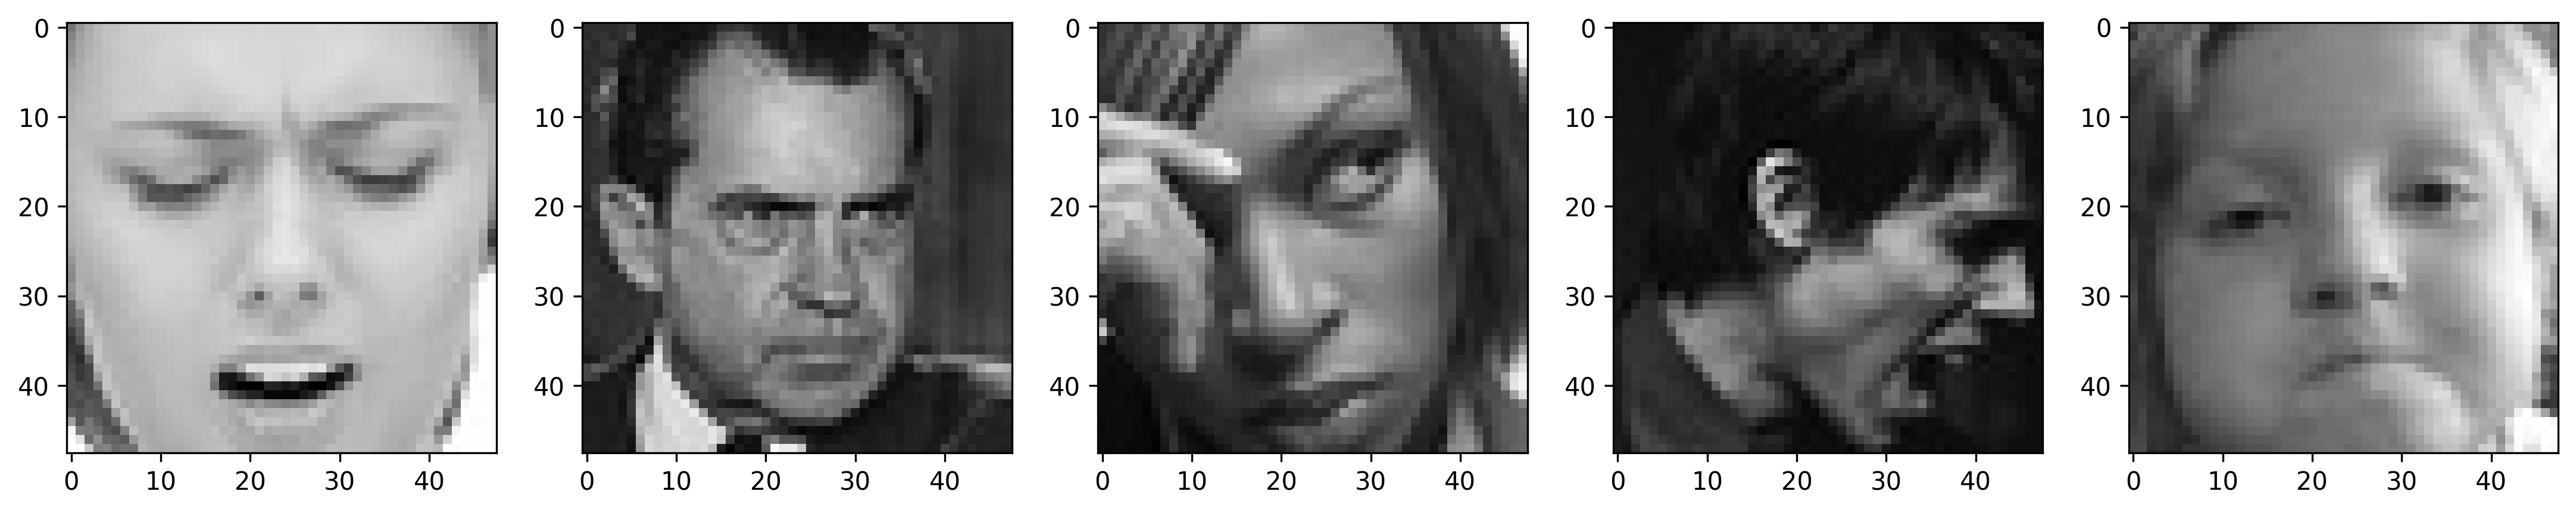

disgust


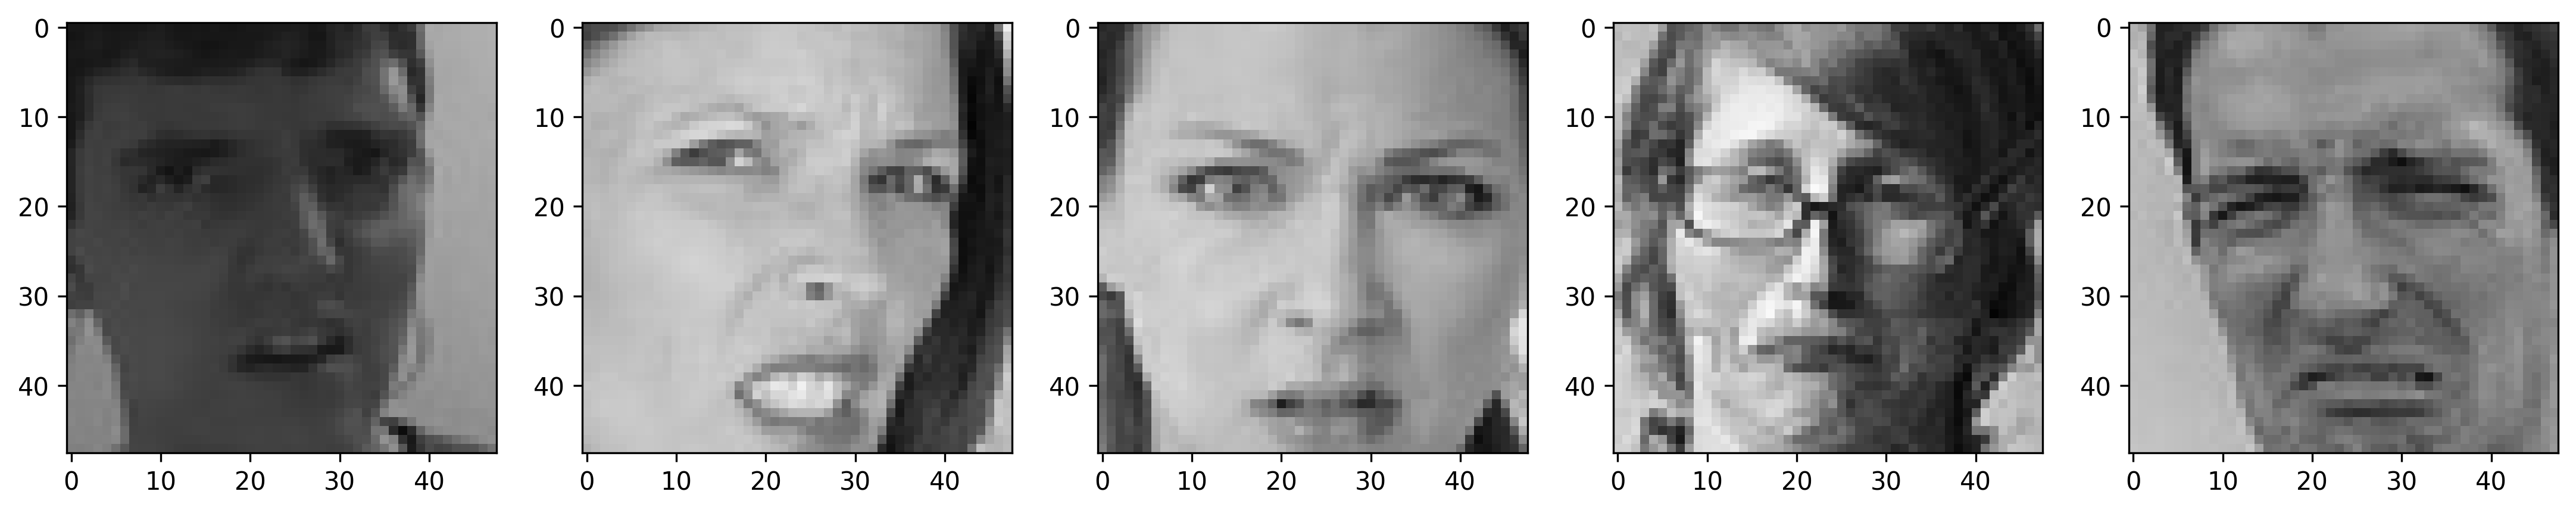

fear


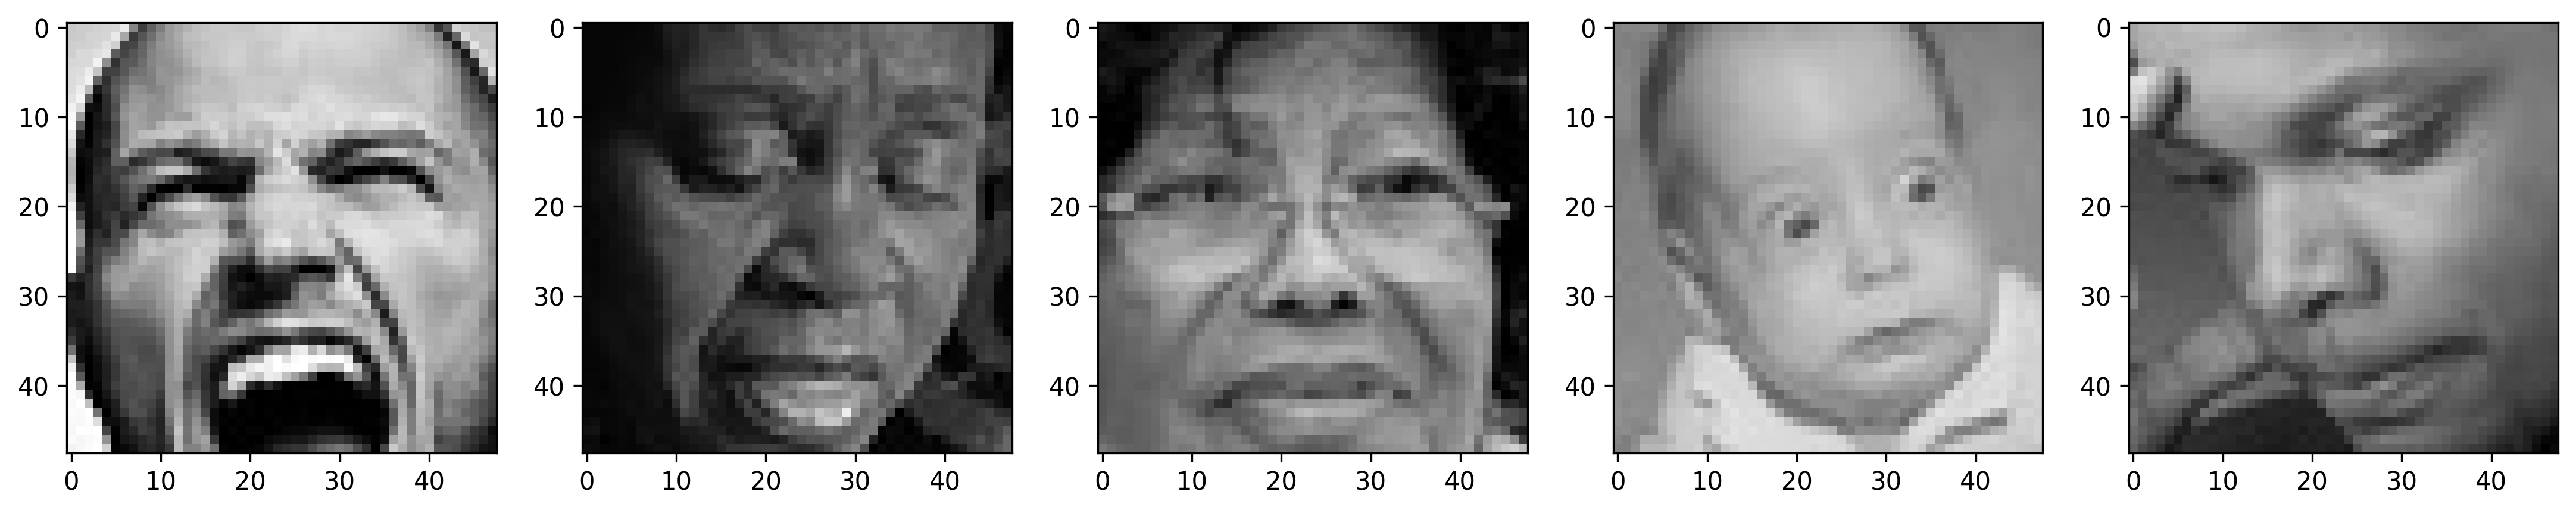

happy


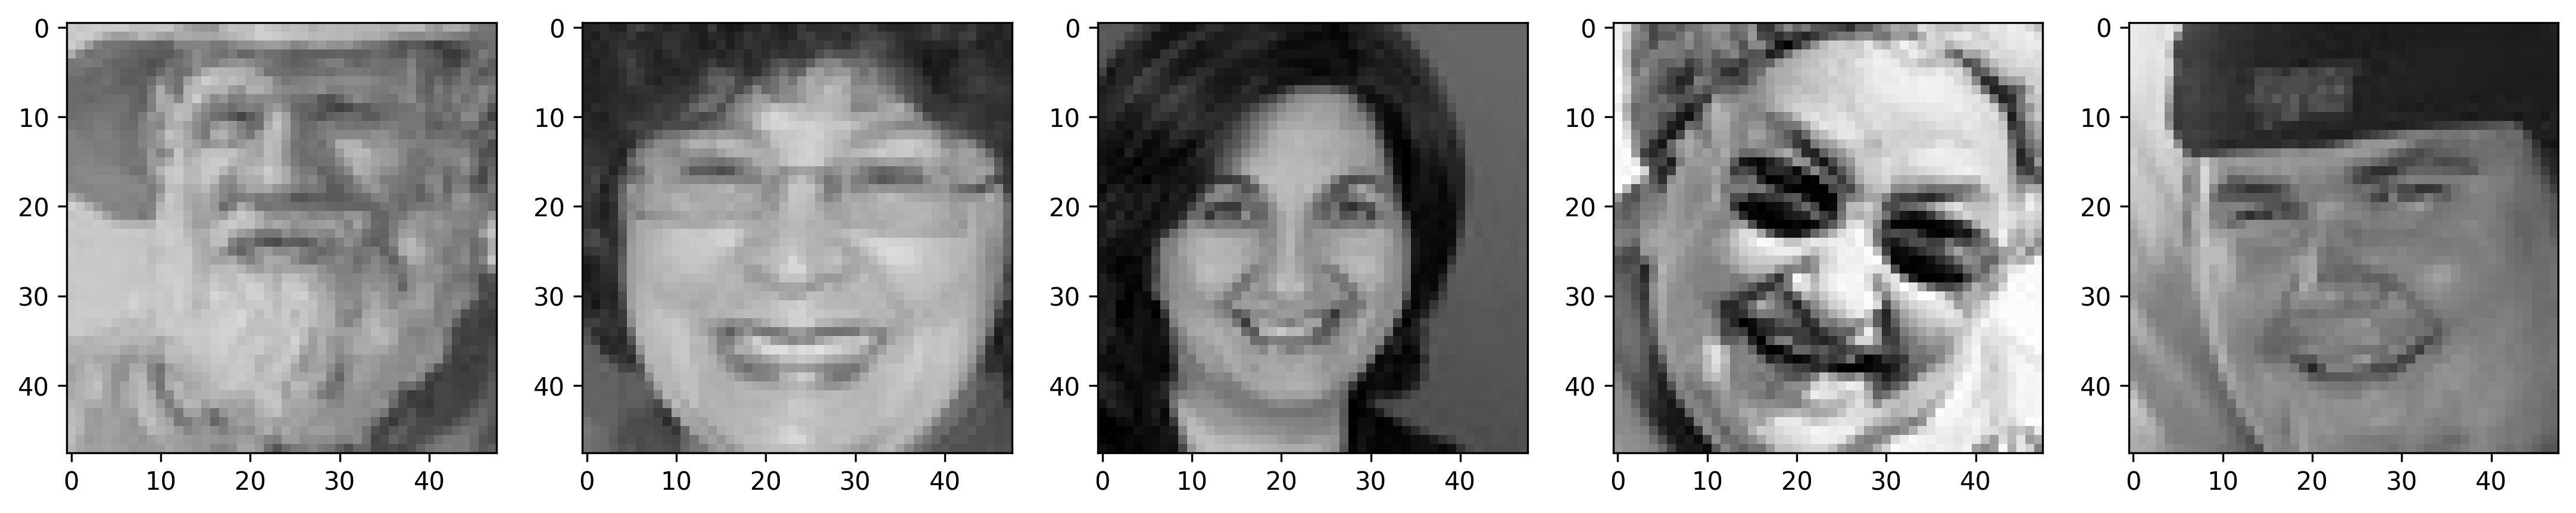

neutral


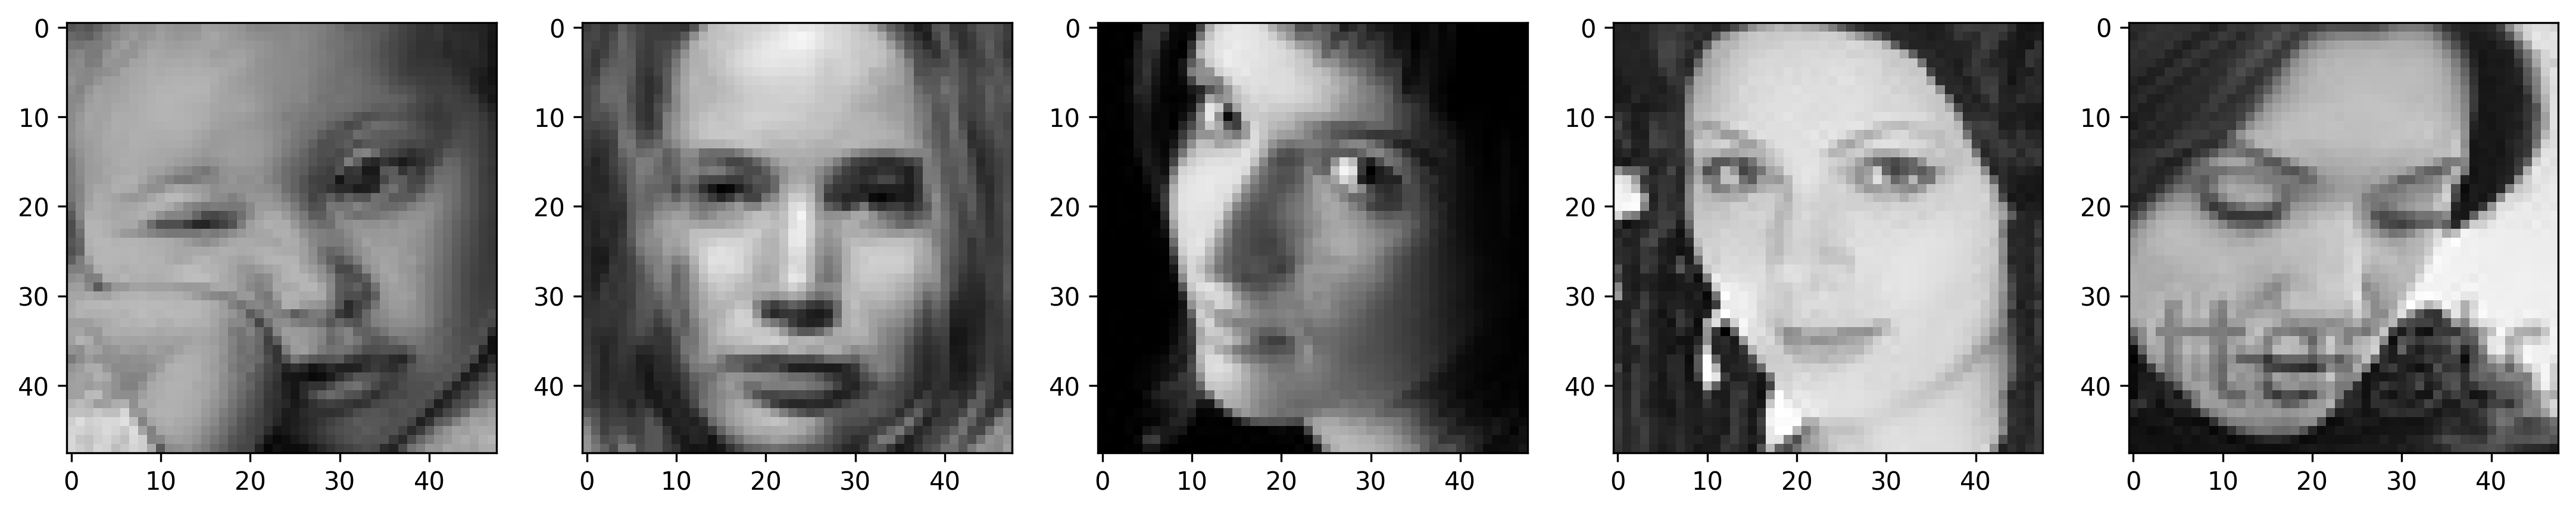

sad


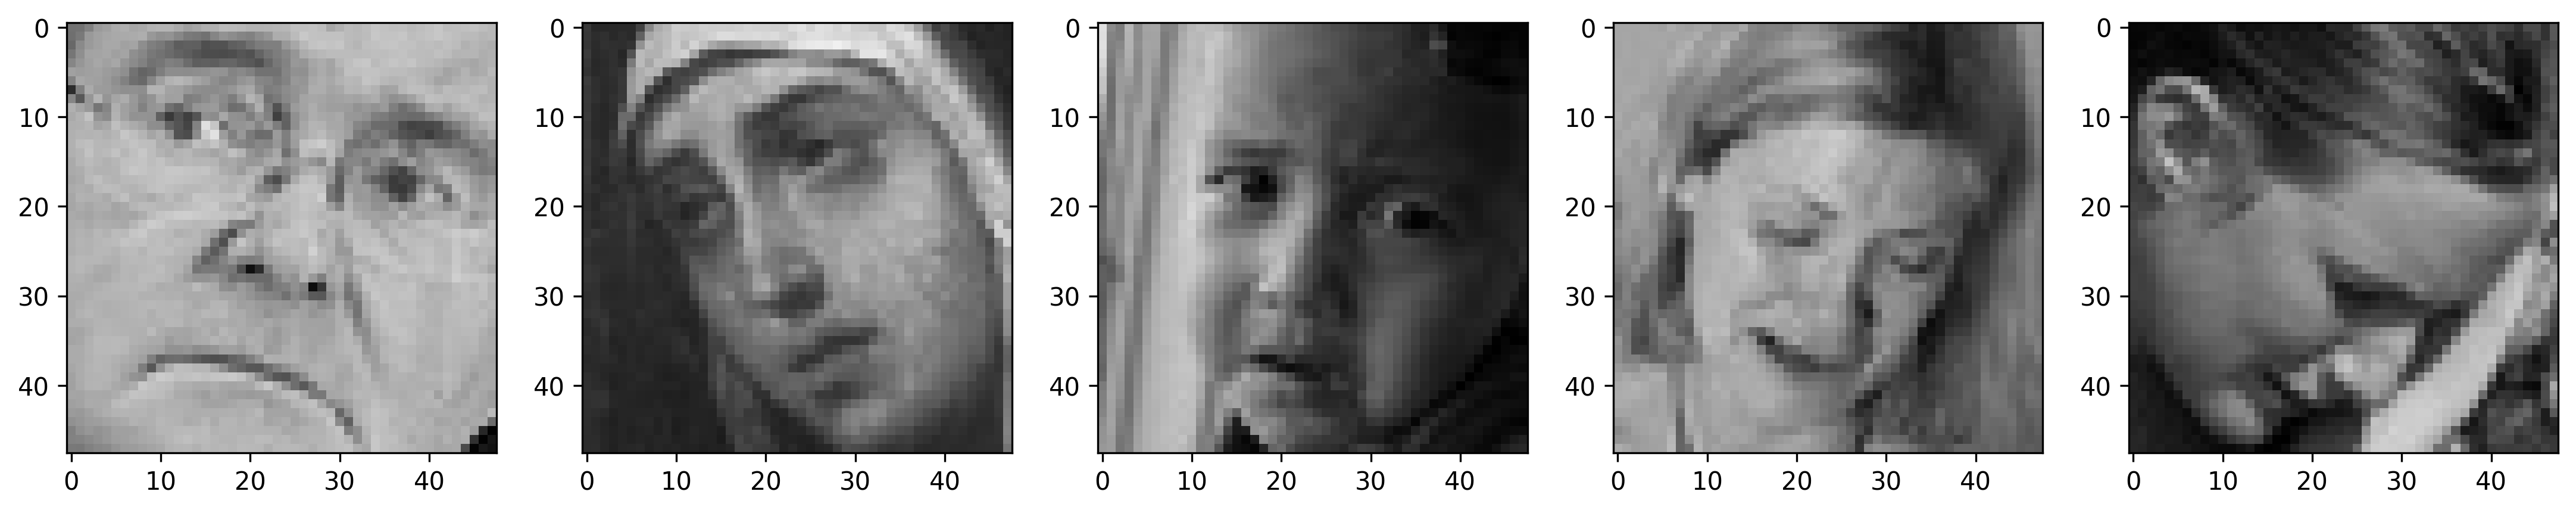

surprise


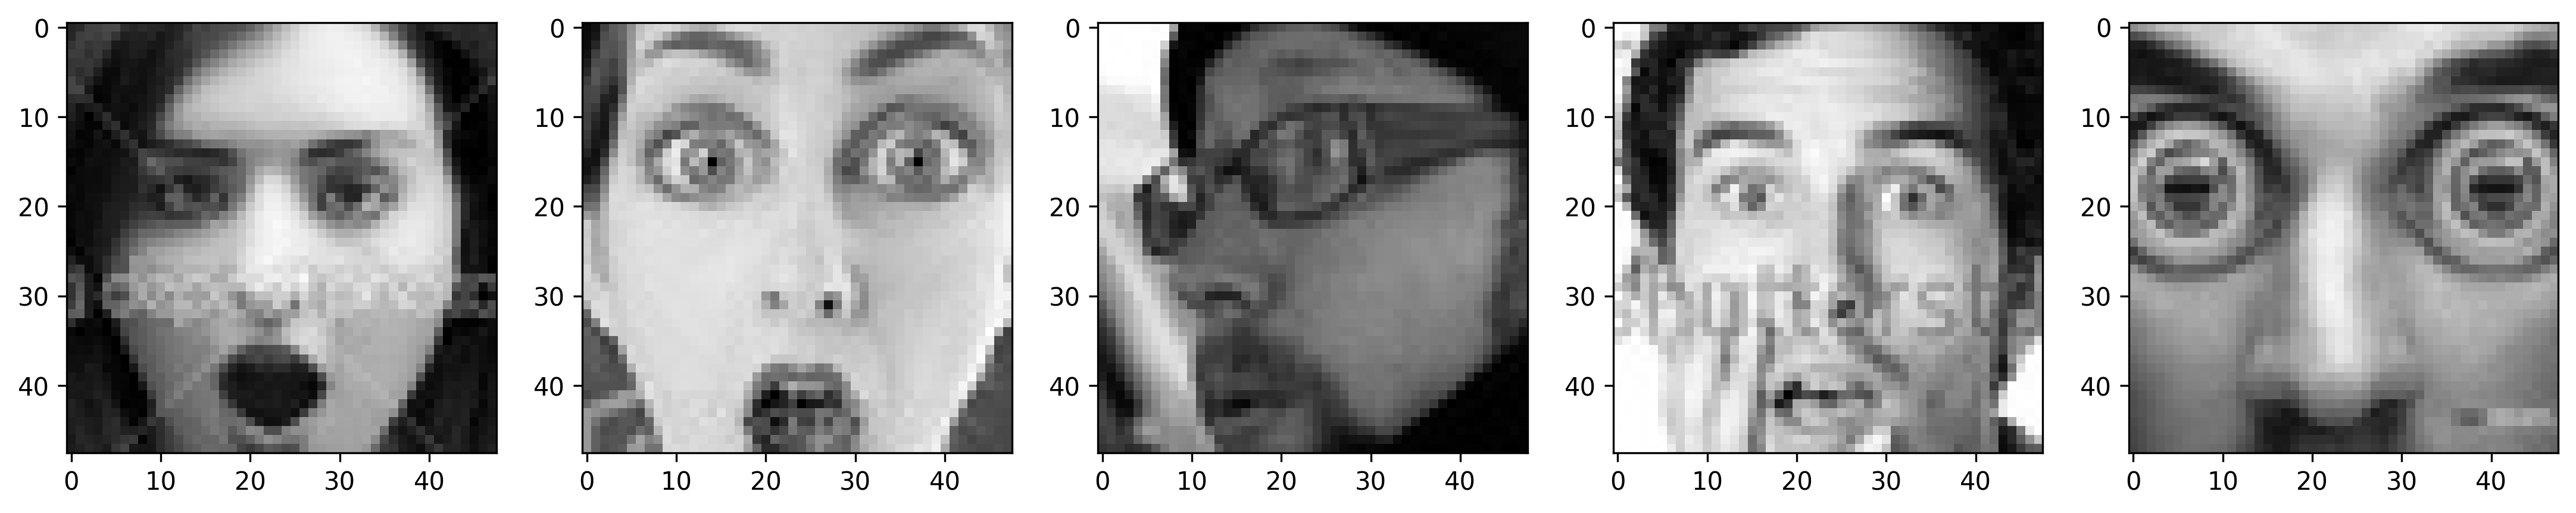

In [2]:
train_path = '../input/fer2013/train/'
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for c in classes:
    print(c)
    #create figure layout
    figure, axes = plt.subplots(nrows=1,ncols=5, figsize=[18,6], dpi=300)
    axes = axes.ravel()
    emo_path = os.path.join(train_path, c)
    image_list = os.listdir(emo_path)[:5]

    #intaract over image list to add them into figure
    for i in range(len(axes)):
        axes[i].imshow(load_img(os.path.join(emo_path, image_list[i])))

    plt.show()

In [3]:
model = Sequential()

# 1 convalutional
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2 convalutional
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3 convalutional
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4 convalutional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

2022-04-22 06:27:09.623646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:09.741592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:09.742366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:09.743500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

node zero
2022-04-22 06:27:09.744567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:09.745280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:11.565243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:11.566076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 06:27:11.566783: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

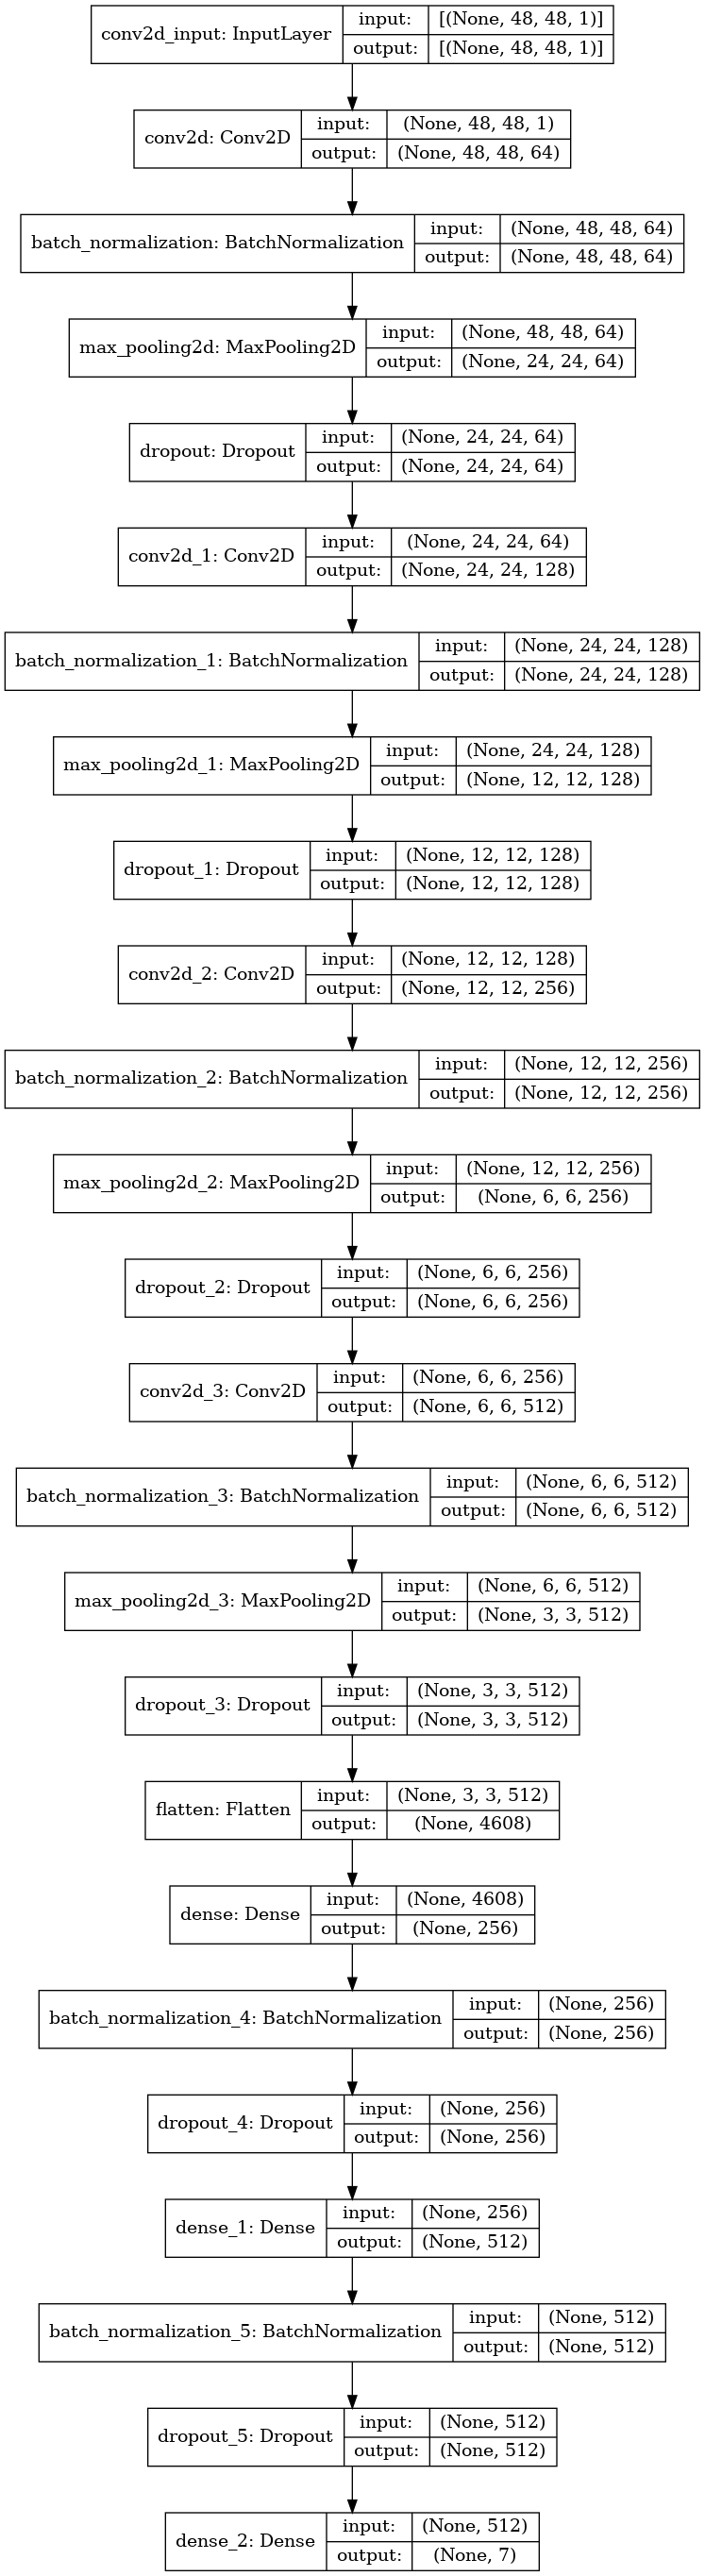

In [4]:
plot_model(model,
           show_shapes=True,
           show_layer_names=True)

In [5]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True,
                                  validation_split=0.2)

train_gen = datagen_train.flow_from_directory("../input/fer2013/train/",
                                                    target_size=(img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset='training')

validation_gen = datagen_train.flow_from_directory('../input/fer2013/train/',
                                                    target_size=(img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset='validation')

datagen_validation = ImageDataGenerator(horizontal_flip=True)

test_gen = datagen_validation.flow_from_directory('../input/fer2013/test/',
                                                    target_size=(img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=2,
                              min_lr=0.00001,
                              model='auto')

check_point = ModelCheckpoint(filepath='FER_VGG.hdf5',
                              monitor='val_loss',
                              save_best_only=True,
                              mode='min',
                              verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=7,
                           restore_best_weights=True)

callbacks = [reduce_lr, check_point, early_stop]

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
history = model.fit(train_gen,
                      epochs=300,
                      callbacks=callbacks,
                      validation_data=validation_gen)

2022-04-22 06:27:29.725266: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-04-22 06:27:31.895931: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


359/359 [==============================] - 92s 235ms/step - loss: 2.1086 - accuracy: 0.2416 - val_loss: 1.8204 - val_accuracy: 0.2963

Epoch 00001: val_loss improved from inf to 1.82036, saving model to FER_VGG.hdf5
Epoch 2/300
359/359 [==============================] - 25s 68ms/step - loss: 1.7468 - accuracy: 0.3432 - val_loss: 1.5664 - val_accuracy: 0.3921

Epoch 00002: val_loss improved from 1.82036 to 1.56640, saving model to FER_VGG.hdf5
Epoch 3/300
359/359 [==============================] - 23s 65ms/step - loss: 1.5223 - accuracy: 0.4236 - val_loss: 1.7142 - val_accuracy: 0.4041

Epoch 00003: val_loss did not improve from 1.56640
Epoch 4/300
359/359 [==============================] - 22s 62ms/step - loss: 1.3797 - accuracy: 0.4749 - val_loss: 1.4778 - val_accuracy: 0.4679

Epoch 00004: val_loss improved from 1.56640 to 1.47780, saving model to FER_VGG.hdf5
Epoch 5/300
359/359 [==============================] - 22s 61ms/step - loss: 1.3052 - accuracy: 0.5034 - val_loss: 1.3149 - v

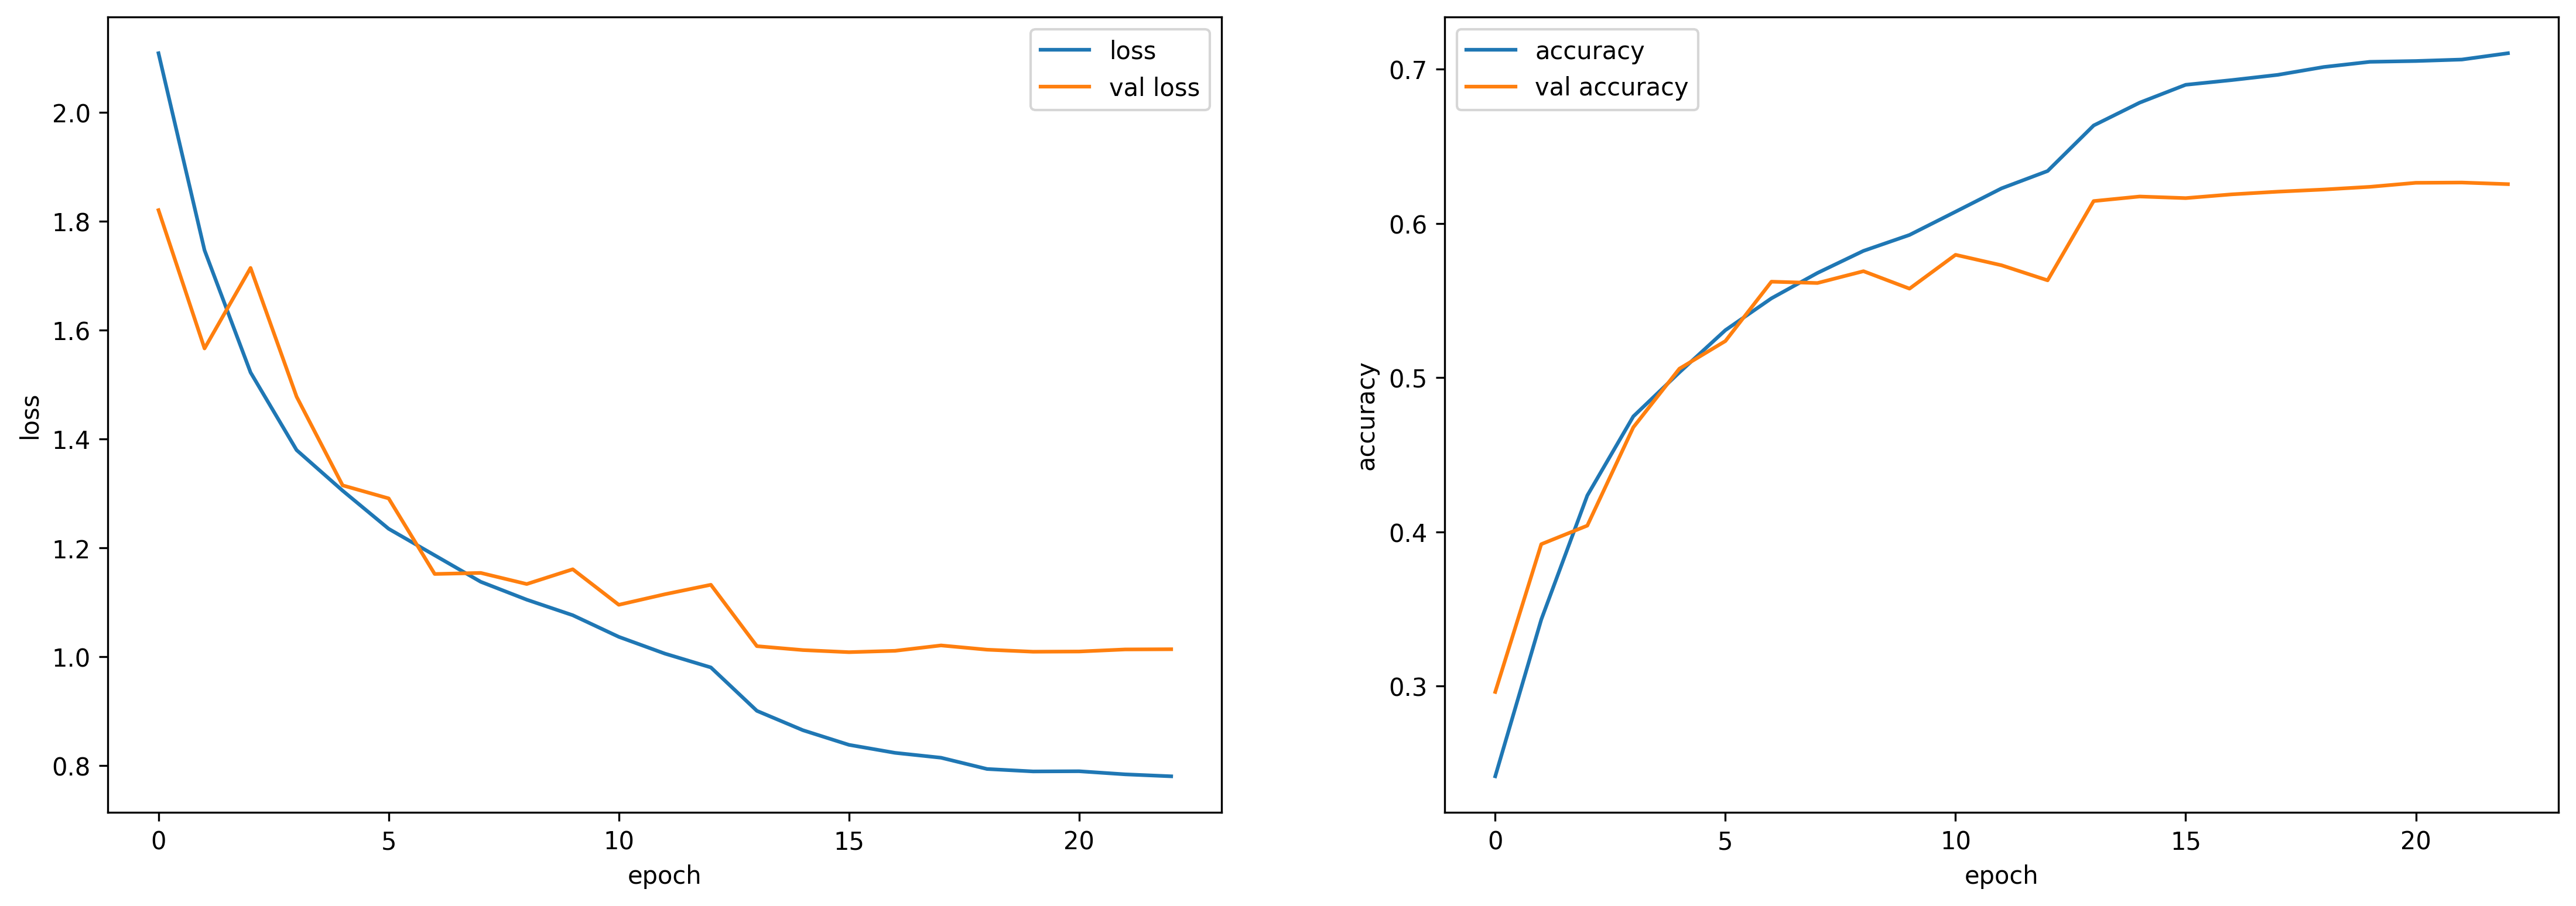

In [9]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(len(history.history['loss'])))

sns.lineplot(x=epochs, y=history.history['loss'], ax=axes[0], label='loss')
sns.lineplot(x=epochs, y=history.history['val_loss'], ax=axes[0], label='val loss')
sns.lineplot(x=epochs, y=history.history['accuracy'], ax=axes[1], label='accuracy')
sns.lineplot(x=epochs, y=history.history['val_accuracy'], ax=axes[1], label='val accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.savefig('FER_VGG_train_history.png')
plt.show()

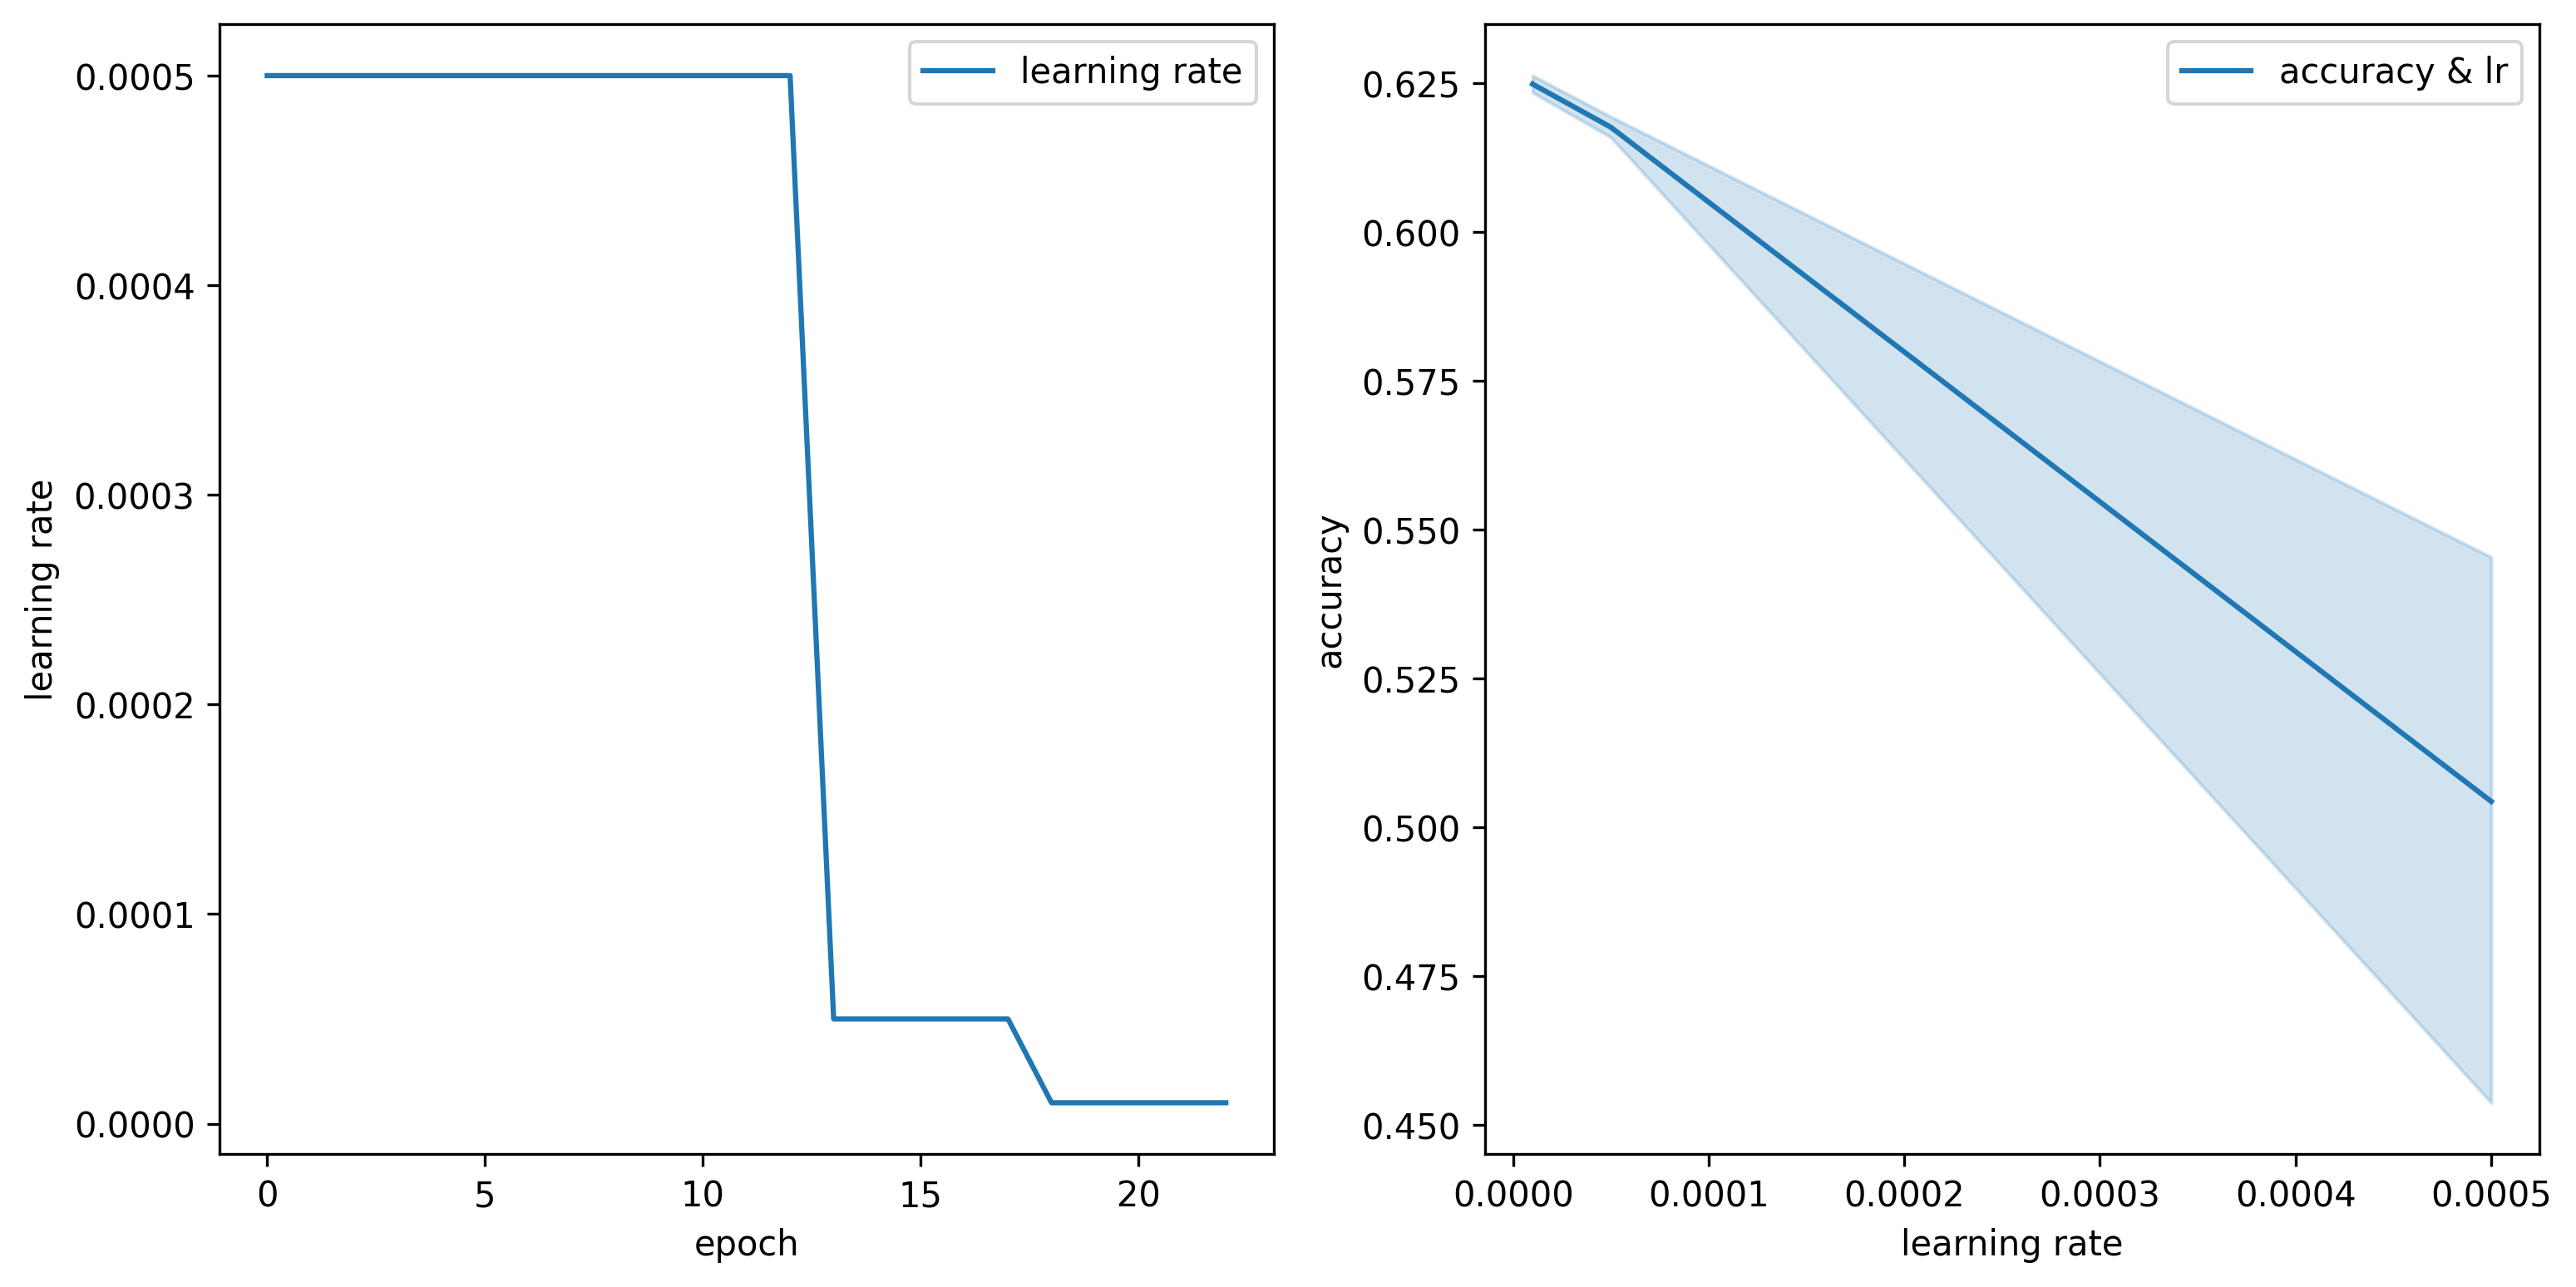

In [10]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[12, 6], dpi=300)
axes = axes.ravel()

sns.lineplot(x=epochs, y=history.history['lr'], ax=axes[0], label='learning rate')
sns.lineplot(x=history.history['lr'], y=history.history['val_accuracy'], ax=axes[1], label='accuracy & lr')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('learning rate')
axes[1].set_xlabel('learning rate')
axes[1].set_ylabel('accuracy')

plt.savefig('FER_VGG_lr_history.png')
plt.show()

In [11]:
model.evaluate(validation_gen)

90/90 [==============================] - 4s 48ms/step - loss: 1.0151 - accuracy: 0.6123


[1.015065312385559, 0.6122626662254333]